# Import libraries

In [1]:
import pandas as pd
import numpy as np
import cmath
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
PATH = r'C:\Users\LIIAARC LAPTOP - 02\Desktop\Armband\Armband_matlab_files\Data\Data_6_12\Captura1'

# Reading Data

In [34]:
sensor_01 = np.loadtxt(PATH+'\sensor_1_1.txt')
sensor_02 = np.loadtxt(PATH+'\sensor_2_1.txt')
sensor_01 = sensor_01.reshape(1,len(sensor_01))
sensor_02 = sensor_02.reshape(1,len(sensor_02))
for i in range(9):
    # Cargando la data
    path_sensor_1 = '\sensor_1_'+str(i+2)+'.txt'
    path_sensor_2 = '\sensor_1_'+str(i+2)+'.txt'
    data_sensor_1 = np.loadtxt(PATH+path_sensor_1)
    data_sensor_2 = np.loadtxt(PATH+path_sensor_2)
    # Redimensionando la data a (8000,1)
    data_sensor_1 = data_sensor_1.reshape(1,len(data_sensor_1))
    data_sensor_2 = data_sensor_2.reshape(1,len(data_sensor_2))
    # Acumulando la data
    sensor_01 = np.concatenate([sensor_01,data_sensor_1],axis=0)
    sensor_02 = np.concatenate([sensor_02,data_sensor_2],axis=0)

# Funciones

In [4]:
# LECTURA DE DATOS DE UNA CARPETA
def read_data_semg(PATH):
    sensor_01 = np.loadtxt(PATH+'\sensor_1_1.txt')
    sensor_02 = np.loadtxt(PATH+'\sensor_2_1.txt')
    sensor_01 = sensor_01.reshape(1,len(sensor_01))
    sensor_02 = sensor_02.reshape(1,len(sensor_02))
    for i in range(9):
        # Cargando la data
        path_sensor_1 = '\sensor_1_'+str(i+2)+'.txt'
        path_sensor_2 = '\sensor_1_'+str(i+2)+'.txt'
        data_sensor_1 = np.loadtxt(PATH+path_sensor_1)
        data_sensor_2 = np.loadtxt(PATH+path_sensor_2)
        # Redimensionando la data a (8000,1)
        data_sensor_1 = data_sensor_1.reshape(1,len(data_sensor_1))
        data_sensor_2 = data_sensor_2.reshape(1,len(data_sensor_2))
        # Acumulando la data
        sensor_01 = np.concatenate([sensor_01,data_sensor_1],axis=0)
        sensor_02 = np.concatenate([sensor_02,data_sensor_2],axis=0)
    return sensor_01, sensor_02

# SUAVIZADO DE LA SEÑAL
def moving_average(NumTimePeriod,offset,data):
    mylist = data
    N = NumTimePeriod
    cumsum, moving_aves = [0], []
    
    for i, x in enumerate(mylist, 1):
        cumsum.append(cumsum[i-1] + x)
        if (((i-N)>=0) & ((i-N)%offset==0)):
            div = int((i-N)/offset)
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

# EXTRACCIÓN DE CARACTERÍSTICAS DE LA SEÑAL PROCESADA

# Integrated emg
def iemg(emg):
    I=sum(np.abs(emg))
    return I

# Zero crossing
def ZC(emg,umbral):
    N=len(emg)
    product=np.multiply(emg[0:N-1],emg[1:N])
    dif=np.abs(emg[0:N-1]-emg[1:N])
    s=0
    for i in range(N-1):
        sgn=0
        dif_cond=0
        if(product[i]>=umbral):
            sgn=1
        if(dif[i]>=umbral):
            dif_cond=1
        s = s + (sgn*dif_cond)
    return s

# Wave length - Longitud de la onda
def WL(emg):
    N=len(emg)
    dif=emg[1:N]-emg[0:N-1]
    wl=sum(np.abs(dif))
    return wl

# Willison amplitude
def WAMP(emg,umbral):
    N=len(emg)
    dif=emg[1:N]-emg[0:N-1]
    dif_abs=np.abs(dif)
    s=0
    for i in range(N-1):
        if (dif_abs[i]>= umbral):
            s=s+1
    return s

# Mean Absolute Value
def mav(emg):
    N=len(emg)
    mav=(1/N)*sum(np.abs(emg))
    return mav

# Modified mean absolute value
def mmav1(emg):
    N=len(emg)
    suma=0.5*sum(np.abs(emg))+0.5*sum(np.abs(emg[int(0.25*N):int(0.75*N)]))
    mmav1=(1/N)*suma
    return mmav1

# Variance of EMG
def VAR(emg):
    N=len(emg)
    var=(1/(N-1))*sum(np.abs(emg)*np.abs(emg))
    return var

# Root Mean Square
def RMS(emg):
    N=len(emg)
    rms=np.sqrt((1/N)*sum(np.abs(emg)*np.abs(emg)))
    return rms

# LOG detector
def LOG(emg):
    N=len(emg)
    suma=sum(np.log(np.abs(emg)+0.01))
    LOG=np.exp(suma/N)
    return LOG

# Slope Sign Change
def SSC(emg,umbral):
    N=len(emg)
    dif1=emg[1:N-1]-emg[0:N-2]
    dif2=emg[1:N-1]-emg[2:N]
    product=np.multiply(dif1,dif2)
    s=0
    for i in range(N-2):
        if (product[i]>= umbral):
            s=s+1
    return s



# Plotting data

## Libre - primera captura

In [5]:
amplitud_sensor_01 = np.max(sensor_01,axis=1)
amplitud_sensor_02 = np.max(sensor_02,axis=1)

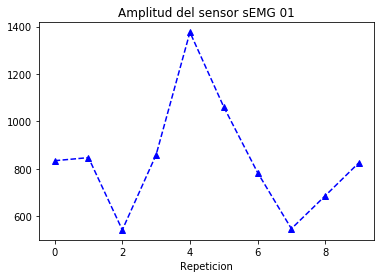

In [6]:
plt.plot(amplitud_sensor_01,'b^--');
plt.title('Amplitud del sensor sEMG 01');
plt.xlabel('Repeticion');

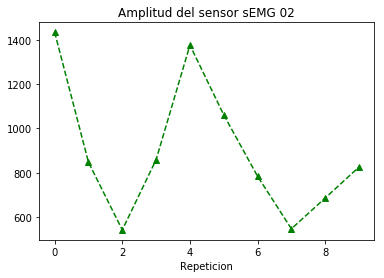

In [7]:
plt.plot(amplitud_sensor_02,'g^--');
plt.title('Amplitud del sensor sEMG 02');
plt.xlabel('Repeticion');

In [8]:
PATH_1 = r'C:\Users\LIIAARC LAPTOP - 02\Desktop\Armband\Armband_matlab_files\Data\Data_6_12\Captura1'

In [9]:
sensor_01_1, sensor_02_1 = read_data_semg(PATH_1)
amplitud_sensor_01_1 = np.max(sensor_01_1,axis=1)
amplitud_sensor_02_1 = np.max(sensor_02_1,axis=1)

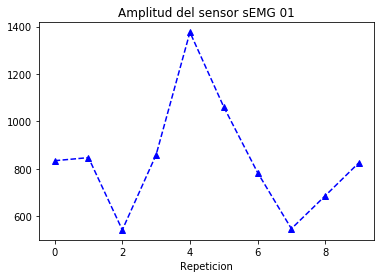

In [10]:
plt.plot(amplitud_sensor_01_1,'b^--');
plt.title('Amplitud del sensor sEMG 01');
plt.xlabel('Repeticion');

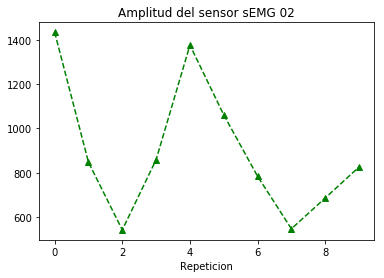

In [11]:
plt.plot(amplitud_sensor_02_1,'g^--');
plt.title('Amplitud del sensor sEMG 02');
plt.xlabel('Repeticion');

## Bolsa con peso - Segunda captura

In [12]:
PATH_2 = r'C:\Users\LIIAARC LAPTOP - 02\Desktop\Armband\Armband_matlab_files\Data\Data_6_12\Captura2'

In [13]:
sensor_01_2, sensor_02_2 = read_data_semg(PATH_2)
amplitud_sensor_01_2 = np.max(sensor_01_2,axis=1)
amplitud_sensor_02_2 = np.max(sensor_02_2,axis=1)

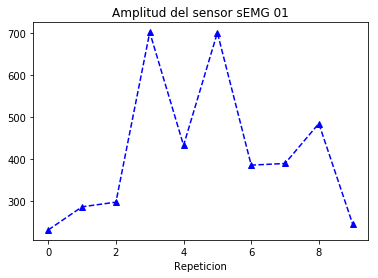

In [14]:
plt.plot(amplitud_sensor_01_2,'b^--');
plt.title('Amplitud del sensor sEMG 01');
plt.xlabel('Repeticion');

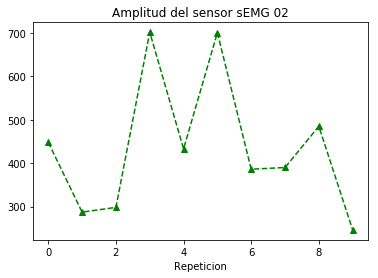

In [15]:
plt.plot(amplitud_sensor_02_2,'g^--');
plt.title('Amplitud del sensor sEMG 02');
plt.xlabel('Repeticion');

## Mochila con peso - Tercera captura

In [29]:
PATH_3 = r'C:\Users\LIIAARC LAPTOP - 02\Desktop\Armband\Armband_matlab_files\Data\Data_7_12\Captura1'

In [30]:
sensor_01_3, sensor_02_3 = read_data_semg(PATH_3)

In [31]:
amplitud_sensor_01_3 = np.max(sensor_01_3,axis=1)
amplitud_sensor_02_3 = np.max(sensor_02_3,axis=1)

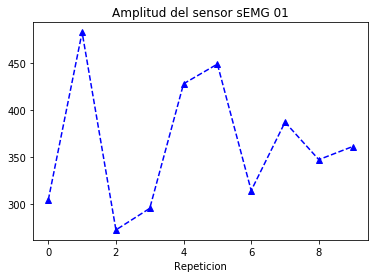

In [32]:
plt.plot(amplitud_sensor_01_3,'b^--');
plt.title('Amplitud del sensor sEMG 01');
plt.xlabel('Repeticion');

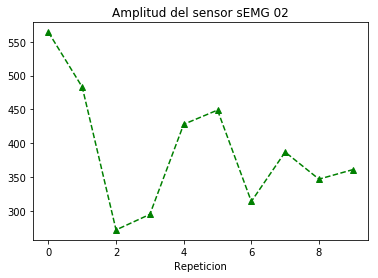

In [33]:
plt.plot(amplitud_sensor_02_3,'g^--');
plt.title('Amplitud del sensor sEMG 02');
plt.xlabel('Repeticion');

## MOVING AVERAGE WITH SLIDING WINDOW

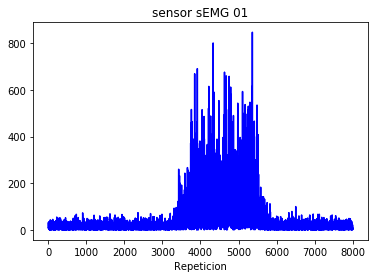

In [41]:
plt.plot(sensor_01[1],'b');
plt.title('sensor sEMG 01');
plt.xlabel('Repeticion');

In [39]:
# Moving average
sensor_01_ma = moving_average(50,25,sensor_01[1])

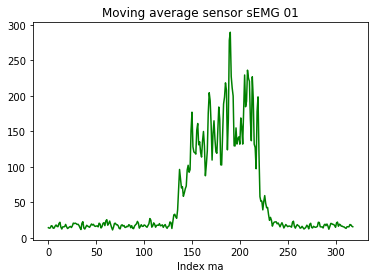

In [40]:
plt.plot(sensor_01_ma,'g');
plt.title('Moving average sensor sEMG 01');
plt.xlabel('Index ma');

## ANÁLISIS EN FRECUENCIA DE LA SEÑAL

In [24]:
data = sensor_01[8]

### TRANSFORMADA RÁPIDA DE FOURIER

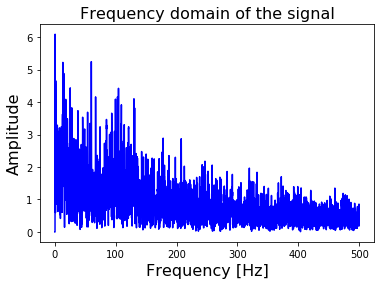

In [25]:
from scipy.fftpack import fft
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 8
N = 8000
T = t_n / N
f_s = 1/T

composite_y_value = data
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
fft_values[0:4] = 0 # En frecuencias cercanas a cero presenta una alta amplitud. Why?
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

### POWER SPECTRAL DENSITY

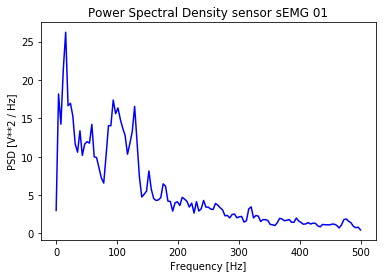

In [42]:
from scipy.signal import welch
 
def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values
 
 
t_n = 8 # 8 segundos
N = 8000 # Número de muestras
T = t_n / N # Periodo de muestreo
f_s = 1/T # Frecuencia de muestreo
 
f_values, psd_values = get_psd_values(composite_y_value, T, N, f_s)
 
plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.title('Power Spectral Density sensor sEMG 01');
plt.show()

### FUNCIONES DE GENERACIÓN DE DATA TRANSFORMADA - MA - PSD

In [54]:
def generate_ma_data(data, NumPeriod, Overlap):
    data_ma_list = []
    for serie in data:
        data_ma_list.append(moving_average(NumPeriod,Overlap,serie))
    return data_ma_list

def generate_psd_data(data,T,N,f_s):
    data_psd_list = []
    data_f_list = []
    for serie in data:
        f_values, psd_values = get_psd_values(serie,T,N,f_s)
        data_psd_list.append(psd_values)
        data_f_list.append(f_values)
    data_psd_total = [data_f_list, data_psd_list]
    return data_psd_total

In [46]:
ma_sensor_01_1 = generate_ma_data(sensor_01_1, 50, 25)

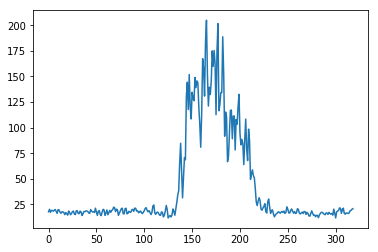

In [52]:
plt.plot(ma_sensor_01_1[9])

In [69]:
t_n = 8 # 8 segundos
N = 8000 # Número de muestras
T = t_n / N # Periodo de muestreo
f_s = 1/T # Frecuencia de muestreo

psd_sensor_01_1 = generate_psd_data(sensor_01_1,T,N,f_s)
# result[index_f_or_psd_value][index_repetition]
# index_f_or_psd_value = [0 or 1]
# index_repetition = [0 to 9]

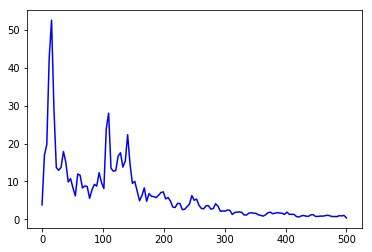

In [70]:
plt.plot(psd_sensor_01_1[0][0], psd_sensor_01_1[1][0], linestyle='-', color='blue')